In [1]:
import propagators
import energy_landscapes
import energy_landscapes_gaussian
import long_simulation
import weighted_ensemble_3
import numpy as np
import MSM_methods
import analysis
import metadynamics

import matplotlib.pyplot as plt
import importlib

#methods for fast print debugging
def p(x):
    print(x)
def pl(x):
    print(len(x))
def ps(x):
    print(x.shape)


In [2]:
#shared parameters

kT = 1
dt = 0.001
n_analysis_bins = 50
save_period = 100 #in steps
aggregate_simulation_limit = 10000000
molecular_time_limit = 100000
n_bootstrap = 3

system1 = energy_landscapes.unit_double_well()
# system1.plot_quantity(system1.potential)
# plt.show()

#TODO: we need to add a way to model methods that serially use a single core to mimic parallel computations (i.e. if you tried to run WESTPA on one GPU core)

#hardware/real world objects:
# GPUs, wall clock hours, aggregate GPU hours
#if we're trying to model a commercial cluster where we can buy as many gpus as we want at any one time but have to pay per GPU hour, wall clock time and aggregate GPU hours are the relevant metrics
#if we're trying to model a lab cluster where we have a fixed number of GPUs and a fixed amount of time to publish and graduate, the number of GPUs and wall clock time are the relevant metrics

#simulation parameters (both are maximum values):
# aggregate simulation time, molecular time
# AKA (how much the simulation costs, how much time it adds to your PhD)



<function long_simulation_histogram_analysis at 0x7f901afa9090>
replicate 0
replicate 1
replicate 2
<function long_simulation_histogram_analysis_mtd at 0x7f901afa9120>
replicate 0
replicate 1
replicate 2
<function long_simulation_msm_analysis at 0x7f901afa9240>
replicate 0
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
replicate 1
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector converged to within 10^-12 after 0 rounds
eigenvector 

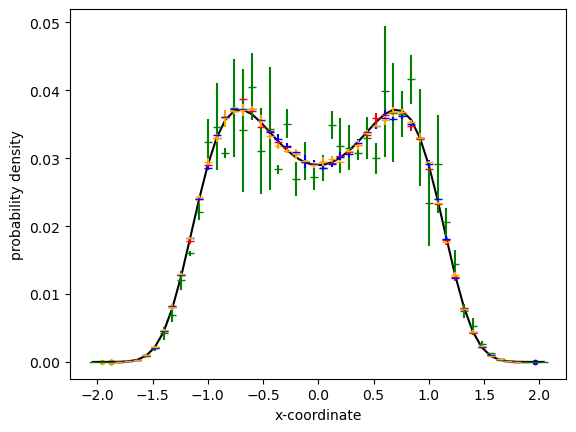

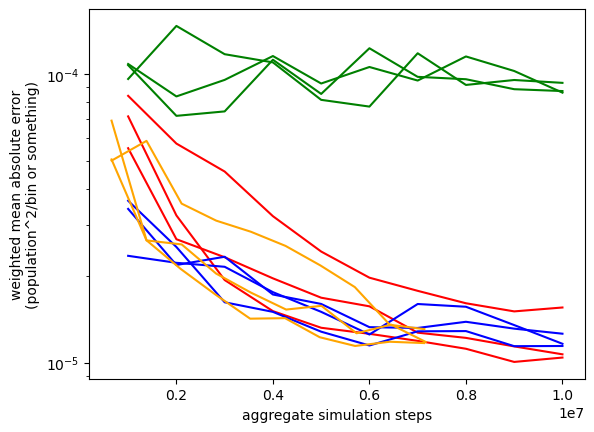

In [3]:
importlib.reload(analysis)
importlib.reload(long_simulation)
importlib.reload(weighted_ensemble_3)
importlib.reload(propagators)
importlib.reload(energy_landscapes_gaussian)
importlib.reload(energy_landscapes)
importlib.reload(MSM_methods)
importlib.reload(metadynamics)


#long_simulation.long_simulation_histogram_analysis, long_simulation.long_simulation_hamsm_analysis, weighted_ensemble_2.weighted_ensemble_hamsm_analysis
mfpts_all, populations_all, agg_t_maew_all = analysis.bootstrap_method_comparison(
    3, 
    [long_simulation.long_simulation_histogram_analysis,
     long_simulation.long_simulation_histogram_analysis_mtd, 
     long_simulation.long_simulation_msm_analysis, 
     weighted_ensemble_3.weighted_ensemble_msm_analysis], 
    system1, kT, dt, 
    aggregate_simulation_limit, molecular_time_limit, save_period, 
    n_analysis_bins, n_timepoints=10)

analysis.plot_bootstrapping_results(populations_all, system1, kT, n_analysis_bins)
plt.show()
analysis.plot_convergence(agg_t_maew_all)
plt.show()

#TODO implement MFPT comparison
#TODO fast synthetic trajectories
#TODO compare MSMs built with and without weights